In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.utils.data as data
from torchvision import transforms
import torchvision

import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.my_numpy_class as mnc
import py_func.my_torch_class as mtc
import py_func.models_func as my_model

import py_func.Deep_learning_torch_func as DL
import py_func.dat_rb_func as drb

from torchinfo import summary

from torch.optim import lr_scheduler
import numpy as np
import importlib
import os.path as osp


import matplotlib.pyplot as plt

#### before tuning model dir

In [2]:
outputdir = "../output/need_finetune/SLM_phase/mnist"
howdatadir = osp.join(outputdir, "id/sim_68000train/")

datapath = '../dat/simdat/SLM_phase/1byte/lsd/m_4cm_4cm_3.3mm_notpad_4096x2400_samevalue_sclup_to8192x4800_sim.dat'
labelpath='../dat/label/mnist_label.dat'

# simulation dataset , 1600 from 4096

In [3]:
mnist = mnc.My_numpy(1, datapath)
mnist.simread(70000, 4096)
print(mnist.data.shape)
#68000で学習、1000で評価, 1000でテスト
mnist.data = mnist.data.reshape(70000, 1, 4096)
print(mnist.data.shape)

mlbl = mnc.My_numpy(4, labelpath)
mlbl.labelread(70000)
print(mlbl.data.shape)

#中心1600を取り出す
data = mnist.data[:,:,int(4096/2)-int(1600/2):int(4096/2)+int(1600/2)]
print(data.shape)

myset = mtc.My_dataset(data, mlbl.data)
myset.numpy2tensor_labelint()
myset.splitdata(68000, 1000)
myset.datanormalize()
myset.tensor2dataset()
batch=256
mlt = DataLoader(myset.dataset_train, batch_size = batch, shuffle = True)
mlv = DataLoader(myset.dataset_val, batch_size = batch, shuffle = False)
mltest = DataLoader(myset.dataset_test, batch_size = batch, shuffle = False)

print(len(mlt), len(mlv), len(mltest))

(70000, 4096)
(70000, 1, 4096)
(70000,)
(70000, 1, 1600)
266 4 4


In [5]:
lrdir = osp.join(howdatadir, "lr5e-06")

In [4]:
channel = [1, 16]
kernel_size = [128]
pool_list = [2]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.cnn1d(channel, kernel_size, pool_list, 10, 0.5, 128).to(device)

C:\Users\kawamoto\anaconda3\envs\torch_gpu_6\lib\site-packages\torch\nn\modules\lazy.py:175: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


#### 実験のいい精度のモデルにシミュレーションデータを学習させる

エポック1------------------------------
val_acc0.3900 ,train_acc0.3388
epochtime:0.2855分
エポック2------------------------------
val_acc0.5360 ,train_acc0.4504
epochtime:0.1871分
エポック3------------------------------
val_acc0.5780 ,train_acc0.4895
epochtime:0.1662分
エポック4------------------------------
val_acc0.5910 ,train_acc0.5131
epochtime:0.1716分
エポック5------------------------------
val_acc0.6190 ,train_acc0.5408
epochtime:0.1809分
エポック6------------------------------
val_acc0.6390 ,train_acc0.5532
epochtime:0.1543分
エポック7------------------------------
val_acc0.6610 ,train_acc0.5674
epochtime:0.1911分
エポック8------------------------------
val_acc0.6710 ,train_acc0.5739
epochtime:0.1534分
エポック9------------------------------
val_acc0.6810 ,train_acc0.5860
epochtime:0.1958分
エポック10------------------------------
val_acc0.6820 ,train_acc0.5934
epochtime:0.1569分
エポック11------------------------------
val_acc0.6730 ,train_acc0.5995
epochtime:0.1946分
エポック12------------------------------
val_acc0.6880 ,train_acc0.

エポック97------------------------------
val_acc0.7910 ,train_acc0.7433
epochtime:0.1945分
エポック98------------------------------
val_acc0.7930 ,train_acc0.7434
epochtime:0.1558分
エポック99------------------------------
val_acc0.7940 ,train_acc0.7451
epochtime:0.1942分
エポック100------------------------------
val_acc0.7980 ,train_acc0.7467
epochtime:0.1581分
エポック101------------------------------
val_acc0.8000 ,train_acc0.7466
epochtime:0.1787分
エポック102------------------------------
val_acc0.7990 ,train_acc0.7465
epochtime:0.1729分
エポック103------------------------------
val_acc0.7990 ,train_acc0.7485
epochtime:0.1640分
エポック104------------------------------
val_acc0.8010 ,train_acc0.7479
epochtime:0.1867分
エポック105------------------------------
val_acc0.7970 ,train_acc0.7502
epochtime:0.1526分
エポック106------------------------------
val_acc0.7980 ,train_acc0.7492
epochtime:0.1941分
エポック107------------------------------
val_acc0.8020 ,train_acc0.7514
epochtime:0.1557分
エポック108------------------------------
val_acc0

エポック192------------------------------
val_acc0.8250 ,train_acc0.7929
epochtime:0.1746分
エポック193------------------------------
val_acc0.8280 ,train_acc0.7939
epochtime:0.1612分
エポック194------------------------------
val_acc0.8250 ,train_acc0.7949
epochtime:0.1855分
エポック195------------------------------
val_acc0.8240 ,train_acc0.7954
epochtime:0.1521分
エポック196------------------------------
val_acc0.8260 ,train_acc0.7955
epochtime:0.1942分
エポック197------------------------------
val_acc0.8200 ,train_acc0.7959
epochtime:0.1563分
エポック198------------------------------
val_acc0.8250 ,train_acc0.7965
epochtime:0.1927分
エポック199------------------------------
val_acc0.8290 ,train_acc0.7974
epochtime:0.1570分
エポック200------------------------------
val_acc0.8240 ,train_acc0.7966
epochtime:0.1935分
エポック201------------------------------
val_acc0.8260 ,train_acc0.7976
epochtime:0.1607分
エポック202------------------------------
val_acc0.8240 ,train_acc0.7978
epochtime:0.1774分
エポック203------------------------------
val_a

エポック287------------------------------
val_acc0.8370 ,train_acc0.8249
epochtime:0.1672分
エポック288------------------------------
val_acc0.8410 ,train_acc0.8267
epochtime:0.1707分
エポック289------------------------------
val_acc0.8400 ,train_acc0.8258
epochtime:0.1805分
エポック290------------------------------
val_acc0.8350 ,train_acc0.8268
epochtime:0.1544分
エポック291------------------------------
val_acc0.8350 ,train_acc0.8269
epochtime:0.1930分
エポック292------------------------------
val_acc0.8400 ,train_acc0.8269
epochtime:0.1533分
エポック293------------------------------
val_acc0.8400 ,train_acc0.8266
epochtime:0.1932分
エポック294------------------------------
val_acc0.8400 ,train_acc0.8272
epochtime:0.1561分
エポック295------------------------------
val_acc0.8400 ,train_acc0.8281
epochtime:0.1938分
エポック296------------------------------
val_acc0.8380 ,train_acc0.8284
epochtime:0.1570分
エポック297------------------------------
val_acc0.8430 ,train_acc0.8289
epochtime:0.1821分
エポック298------------------------------
val_a

エポック382------------------------------
val_acc0.8420 ,train_acc0.8491
epochtime:0.1744分
エポック383------------------------------
val_acc0.8430 ,train_acc0.8494
epochtime:0.1643分
エポック384------------------------------
val_acc0.8430 ,train_acc0.8490
epochtime:0.1857分
エポック385------------------------------
val_acc0.8470 ,train_acc0.8504
epochtime:0.1544分
エポック386------------------------------
val_acc0.8480 ,train_acc0.8495
epochtime:0.1944分
エポック387------------------------------
val_acc0.8470 ,train_acc0.8504
epochtime:0.1553分
エポック388------------------------------
val_acc0.8400 ,train_acc0.8503
epochtime:0.1954分
エポック389------------------------------
val_acc0.8470 ,train_acc0.8521
epochtime:0.1539分
エポック390------------------------------
val_acc0.8460 ,train_acc0.8518
epochtime:0.1906分
エポック391------------------------------
val_acc0.8460 ,train_acc0.8512
epochtime:0.1655分
エポック392------------------------------
val_acc0.8430 ,train_acc0.8518
epochtime:0.1729分
エポック393------------------------------
val_a

エポック477------------------------------
val_acc0.8480 ,train_acc0.8684
epochtime:0.1814分
エポック478------------------------------
val_acc0.8470 ,train_acc0.8693
epochtime:0.1579分
エポック479------------------------------
val_acc0.8500 ,train_acc0.8696
epochtime:0.1923分
エポック480------------------------------
val_acc0.8480 ,train_acc0.8690
epochtime:0.1538分
エポック481------------------------------
val_acc0.8470 ,train_acc0.8694
epochtime:0.1954分
エポック482------------------------------
val_acc0.8520 ,train_acc0.8694
epochtime:0.1533分
エポック483------------------------------
val_acc0.8530 ,train_acc0.8705
epochtime:0.1953分
エポック484------------------------------
val_acc0.8500 ,train_acc0.8706
epochtime:0.1604分
エポック485------------------------------
val_acc0.8440 ,train_acc0.8708
epochtime:0.1799分
エポック486------------------------------
val_acc0.8450 ,train_acc0.8706
epochtime:0.1702分
エポック487------------------------------
val_acc0.8470 ,train_acc0.8708
epochtime:0.1657分
エポック488------------------------------
val_a

エポック572------------------------------
val_acc0.8530 ,train_acc0.8855
epochtime:0.1839分
エポック573------------------------------
val_acc0.8510 ,train_acc0.8868
epochtime:0.1522分
エポック574------------------------------
val_acc0.8500 ,train_acc0.8858
epochtime:0.1968分
エポック575------------------------------
val_acc0.8520 ,train_acc0.8862
epochtime:0.1500分
エポック576------------------------------
val_acc0.8520 ,train_acc0.8863
epochtime:0.1954分
エポック577------------------------------
val_acc0.8510 ,train_acc0.8865
epochtime:0.1586分
エポック578------------------------------
val_acc0.8530 ,train_acc0.8874
epochtime:0.1923分
エポック579------------------------------
val_acc0.8510 ,train_acc0.8876
epochtime:0.1591分
エポック580------------------------------
val_acc0.8500 ,train_acc0.8874
epochtime:0.1786分
エポック581------------------------------
val_acc0.8510 ,train_acc0.8872
epochtime:0.1761分
エポック582------------------------------
val_acc0.8530 ,train_acc0.8870
epochtime:0.1605分
エポック583------------------------------
val_a

エポック667------------------------------
val_acc0.8540 ,train_acc0.9008
epochtime:0.1895分
エポック668------------------------------
val_acc0.8550 ,train_acc0.9012
epochtime:0.1498分
エポック669------------------------------
val_acc0.8550 ,train_acc0.9009
epochtime:0.1961分
エポック670------------------------------
val_acc0.8540 ,train_acc0.9012
epochtime:0.1564分
エポック671------------------------------
val_acc0.8560 ,train_acc0.9005
epochtime:0.1951分
エポック672------------------------------
val_acc0.8550 ,train_acc0.9011
epochtime:0.1541分
エポック673------------------------------
val_acc0.8540 ,train_acc0.9016
epochtime:0.1865分
エポック674------------------------------
val_acc0.8530 ,train_acc0.9018
epochtime:0.1678分
エポック675------------------------------
val_acc0.8580 ,train_acc0.9013
epochtime:0.1692分
エポック676------------------------------
val_acc0.8580 ,train_acc0.9026
epochtime:0.1799分
エポック677------------------------------
val_acc0.8540 ,train_acc0.9016
epochtime:0.1581分
エポック678------------------------------
val_a

エポック762------------------------------
val_acc0.8650 ,train_acc0.9132
epochtime:0.1918分
エポック763------------------------------
val_acc0.8620 ,train_acc0.9134
epochtime:0.1576分
エポック764------------------------------
val_acc0.8620 ,train_acc0.9132
epochtime:0.1933分
エポック765------------------------------
val_acc0.8560 ,train_acc0.9131
epochtime:0.1509分
エポック766------------------------------
val_acc0.8610 ,train_acc0.9150
epochtime:0.1944分
エポック767------------------------------
val_acc0.8580 ,train_acc0.9145
epochtime:0.1594分
エポック768------------------------------
val_acc0.8600 ,train_acc0.9134
epochtime:0.1828分
エポック769------------------------------
val_acc0.8630 ,train_acc0.9136
epochtime:0.1719分
エポック770------------------------------
val_acc0.8610 ,train_acc0.9145
epochtime:0.1694分
エポック771------------------------------
val_acc0.8580 ,train_acc0.9139
epochtime:0.1834分
エポック772------------------------------
val_acc0.8610 ,train_acc0.9143
epochtime:0.1518分
エポック773------------------------------
val_a

エポック857------------------------------
val_acc0.8660 ,train_acc0.9245
epochtime:0.1940分
エポック858------------------------------
val_acc0.8670 ,train_acc0.9250
epochtime:0.1509分
エポック859------------------------------
val_acc0.8650 ,train_acc0.9248
epochtime:0.1953分
エポック860------------------------------
val_acc0.8670 ,train_acc0.9250
epochtime:0.1564分
エポック861------------------------------
val_acc0.8650 ,train_acc0.9250
epochtime:0.1938分
エポック862------------------------------
val_acc0.8690 ,train_acc0.9256
epochtime:0.1610分
エポック863------------------------------
val_acc0.8610 ,train_acc0.9261
epochtime:0.1807分
エポック864------------------------------
val_acc0.8680 ,train_acc0.9251
epochtime:0.1730分
エポック865------------------------------
val_acc0.8690 ,train_acc0.9253
epochtime:0.1657分
エポック866------------------------------
val_acc0.8670 ,train_acc0.9259
epochtime:0.1856分
エポック867------------------------------
val_acc0.8660 ,train_acc0.9257
epochtime:0.1533分
エポック868------------------------------
val_a

エポック952------------------------------
val_acc0.8620 ,train_acc0.9354
epochtime:0.1962分
エポック953------------------------------
val_acc0.8690 ,train_acc0.9341
epochtime:0.1578分
エポック954------------------------------
val_acc0.8660 ,train_acc0.9343
epochtime:0.1947分
エポック955------------------------------
val_acc0.8700 ,train_acc0.9349
epochtime:0.1606分
エポック956------------------------------
val_acc0.8690 ,train_acc0.9353
epochtime:0.1781分
エポック957------------------------------
val_acc0.8700 ,train_acc0.9345
epochtime:0.1736分
エポック958------------------------------
val_acc0.8740 ,train_acc0.9344
epochtime:0.1662分
エポック959------------------------------
val_acc0.8680 ,train_acc0.9345
epochtime:0.1872分
エポック960------------------------------
val_acc0.8720 ,train_acc0.9353
epochtime:0.1498分
エポック961------------------------------
val_acc0.8750 ,train_acc0.9352
epochtime:0.1950分
エポック962------------------------------
val_acc0.8720 ,train_acc0.9351
epochtime:0.1542分
エポック963------------------------------
val_a

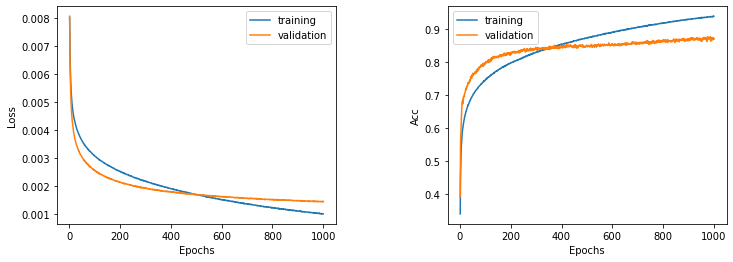

[0.836, 0.002055377662181854]


In [6]:
optimizer = optim.Adam(model.parameters(), lr=5e-06)

epochs = 1000

modelsavedir = osp.join(lrdir, "16ch128ks")
md_path = osp.join(modelsavedir, 'm68000_1600_expe_e1000.pth')

#training
tl, vl, ta, va = DL.train_model_ver3(mlt, mlv, model, criterion, optimizer, epochs, device, \
                                    modelsavedir = modelsavedir, \
                                     saveepoch = 50, saveinterval = 50)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)


val = DL.val_model(mltest, model, device, criterion, False)
print(val)